시퀀스는 순서라는 뜻으로 알고 있었다. 이 시퀀스에 대해 작년에 배운 적이 있었지만 너무 많은 걸 한 번에 배워서 머릿속에 정리가 제대로 안된 것 같다는 생각을 했다.(이제 1년 했다! 괜찮다!) 이전에는 가변과 불변으로 나뉘는 것을 배웠던 기억이 있다. 

책에서 분류를 두 가지 방법으로 분류한다. 먼저 자료형을 같은 것만 담을 수 있냐 다른 것만 담을 수 있냐로 나누어서 분류를 하였다.<br><br>
**컨테이너 시퀀스** <br>
서로 다른 자료형의 항목들을 담을 수 있다. `list`, `tuple`, `collections`, `deque` <br>
**균일 시퀀스** <br>
단 하나의 자료형만 담을 수 있다. `str`, `bytes`, `bytearray`, `memoryview`, `array.array`<br><br>

가변성에 따라서도 분류 가능하다. 이것이 내가 아는 분류 방법이다.<br><br>
**가변 시퀀스** <br>
`list`, `bytearray`, `array.array`, `collections`, `deque`, `memoryview` <br>
**불변 시퀀스** <br>
`str`, `tuple`, `bytes`

### 시퀀스를 간단히 생성하려면
`list comprehension`(list의 경우)나 `generator`(list 이외 sequence)를 사용하면 시퀀스를 간단하게 생성할 수 있다고 한다. 이를 통해서 실행 속도가 더 빠른 코드를 생성할 수 있다고 한다!! 아래 두 코드를 비교해보자

In [5]:
symbols = '!@#$%^'
codes1 = []
codes2 = []
for symbol in symbols:
    codes1.append(ord(symbol)) # ord 값 : 문자의 아스키 코드 돌려줌

codes2 = [ord(symbol) for symbol in symbols]

print(codes1)
print(codes2)

[33, 64, 35, 36, 37, 94]
[33, 64, 35, 36, 37, 94]


이번엔 `map()`과 `filter()` 함수를 이용해서 만들어보자. 우선 이 함수들에 대해 잘 아는지 생각해보았는데, 아니었다.(공부했는데 다 어디갔지???). 그래서 우선 얘들부터 복습이 필요해보인다!<br>
복습은 (https://wikidocs.net/22803)를 참고했다

### map()
map 함수는 반복가능한 **iterable** 객체를 받아서 각 요소에 함수를 적용해주는 함수이다

In [6]:
def add_1(n):
      return n + 1

target = [1, 2, 3, 4, 5]
result = []
for value in target:
     result.append(add_1(value))

print(result)

[2, 3, 4, 5, 6]


이를 `map()` 함수를 이용해서 위와 같은 연산을 더 쉽게, 그리고 메모리도 절약하는 **iterator**을 결과로 받아올 수 있다.

In [9]:
def add_1(n):
      return n + 1

target = [1, 2, 3, 4, 5]
result = map(add_1, target)

print(result) 
print(list(result))

[2, 3, 4, 5, 6]


위 `add_1()`를 재사용할 생각이 없다면, `lambda` 함수를 사용하는게 더 좋다

In [12]:
target = [1,2,3,4,5]
result = map(lambda x : x+1, target)

print(list(result))

[2, 3, 4, 5, 6]


`map()` 함수 안에는 (사용할 함수, 적용될 list) 이런 식으로 들어간다. 이제 까먹지 말자

### filter()
filter 함수는 특정 조건으로 걸러진 요소들로 **iterator** 객체를 만들어서 return해준다. map 함수와 사용 빙법은 동일하나, 함수의 결과가 참인지 거짓인지에 따라, 해당 요소를 포함할지를 결정한다. 말로는 잘 안 와닿아서, 실습을 해봐야겠다.

In [13]:
target = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
result = []

def is_even(n):
      return True if n % 2 == 0 else False

for value in target:
     if is_even(value):
        result.append(value)

print(result)

[2, 4, 6, 8, 10]


이를 `filter()` 함수를 적용하면

In [14]:
target = [1,2,3,4,5,6,7,8,9,10]

def is_even(n):
    return True if n % 2 == 0 else False

result = filter(is_even, target)
print(list(result))

[2, 4, 6, 8, 10]


In [15]:
target = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
result = filter(lambda x : x%2==0, target)
print(list(result))

[2, 4, 6, 8, 10]


이것들을 정리하다보니 liist comprehension이 이해가 되었다. 그래서 다음 걸로 넘어가보려고 한다 ㅎㅎ

tuple, array 등의 sequence 형을 초기화 화려면 list comprehension 말고도, **다른 생성자에 전달할 리스트를 통째로 만들지 않고 iterator protocol을 이용해서 항목을 하나씩 생성하는 표현식**이 있다. 이것이 `generator`이다. 제너레이터 표현식은 메모리를 더 적게 사용한다.

In [16]:
symbols = '!@#$%^'
tuple((ord(symbol)) for symbol in symbols)

(33, 64, 35, 36, 37, 94)

그 전에 array.array와 list의 차이를 아는가?? 차이는 아래 그림과 같다. 그림은 (https://www.slideshare.net/dahlmoon/20160122-2)를 참고했다.
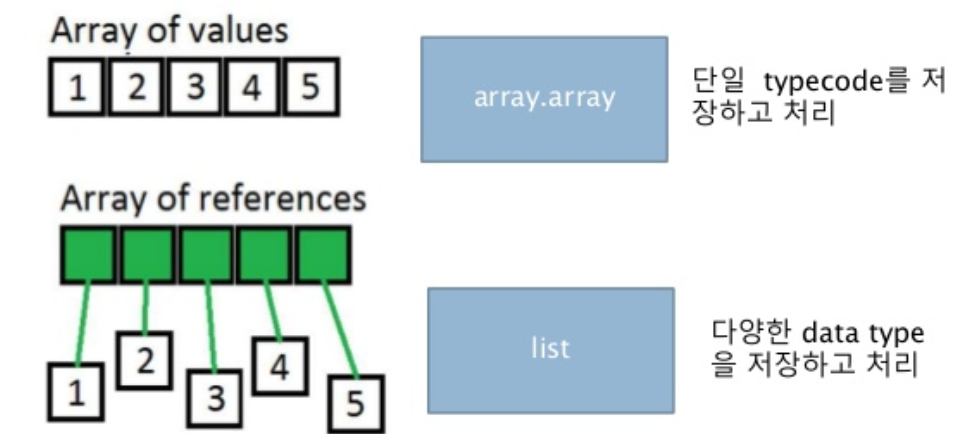

In [18]:
import array
array.array('I', (ord(symbol) for symbol in symbols))

array('I', [33, 64, 35, 36, 37, 94])

제너레이터 표현식이 함수에 보내는 단 하나의 인수라면 괄호 안에 또 괄호를 넣을 필요는 없다.<br>
배열 생성자는 인수를 두 개 받으므로 제너레이터 표현식 앞 뒤에 반드시 괄호를 넣어야 한다. 배열 생성자의 첫 번째 인수는 배열에 들어갈 숫자들을 저장할 자료형을 저장한다.

이제 티셔츠 리스트 여섯 개를 만들어 보겠다. 이 여섯 개 항목을 **메모리 안에 생성하지 않는다**. 제너레이터 표현식은 **한 번에 한 항목을 생성할 수 있도록** for 루프에 데이터를 전달하기 때문이다. 항목이 백만 개 들어 있는 리스트 같은 것을 만드는 경우를 피할 수 있다.

In [22]:
colors = ['black', 'white']
sizes = ['s','w','l']
for tshirt in ('%s %s' % (c, s) for c in colors for s in sizes):
    print(tshirt)

black s
black w
black l
white s
white w
white l
